In [ ]:
#importing required modules 

from fastai import * 
from fastai.vision import * 


In [ ]:
# Use the below command to unzip the images folder 
#!unzip images.zip

# Shell command to unzip files on colab 

In [ ]:

#Creating a dataframe so as to segregate training and test images 

df_train=pd.read_csv('train.csv')
df_train.head()

In [6]:
df_train.emergency_or_not.value_counts()

0    973
1    693
Name: emergency_or_not, dtype: int64

In [7]:
df_test=pd.read_csv('test.csv')
df_test.head()

image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg

In [ ]:
# Creating a databunch object 
src = (ImageList.from_df(df_train,path='./images')
      .split_by_rand_pct(0.2)
      .label_from_df()
      )

tfms = get_transforms() 

size=224

data = src.transform(tfms=tfms, size=size).databunch(bs=16).normalize(imagenet_stats)


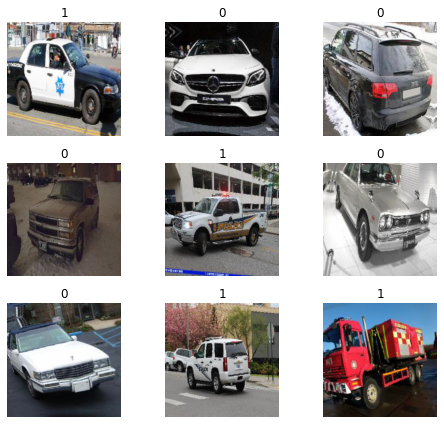

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy,pretrained=True)

In [11]:
learn.fit_one_cycle(4)

In [ ]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


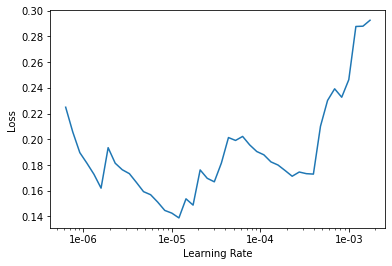

In [17]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(10, max_lr=slice(7e-5,2e-4))

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

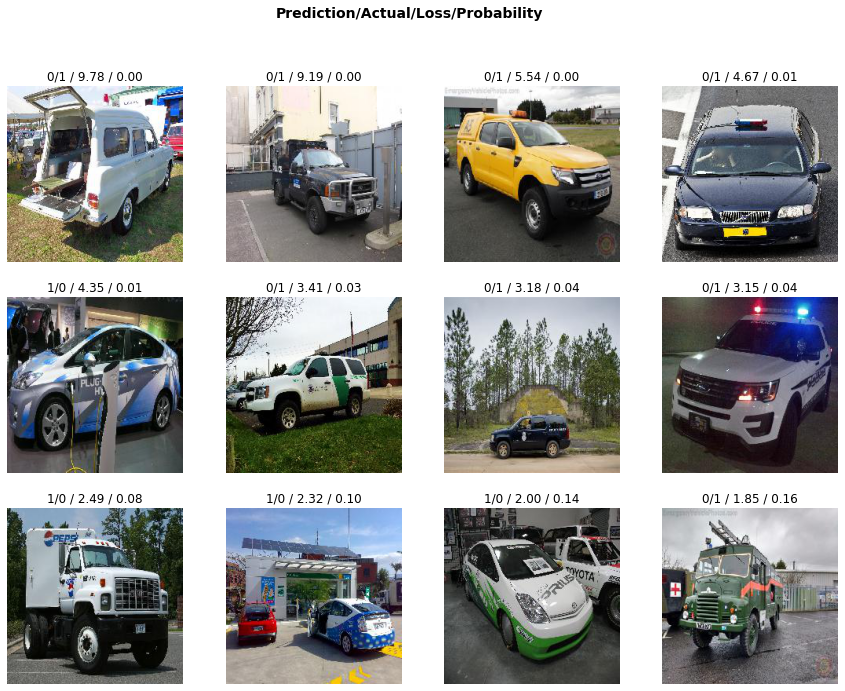

In [23]:
interp.plot_top_losses(12, figsize=(15,11))

In [86]:
data.valid_ds.x.items[idxs][3]

'images/1710.jpg'

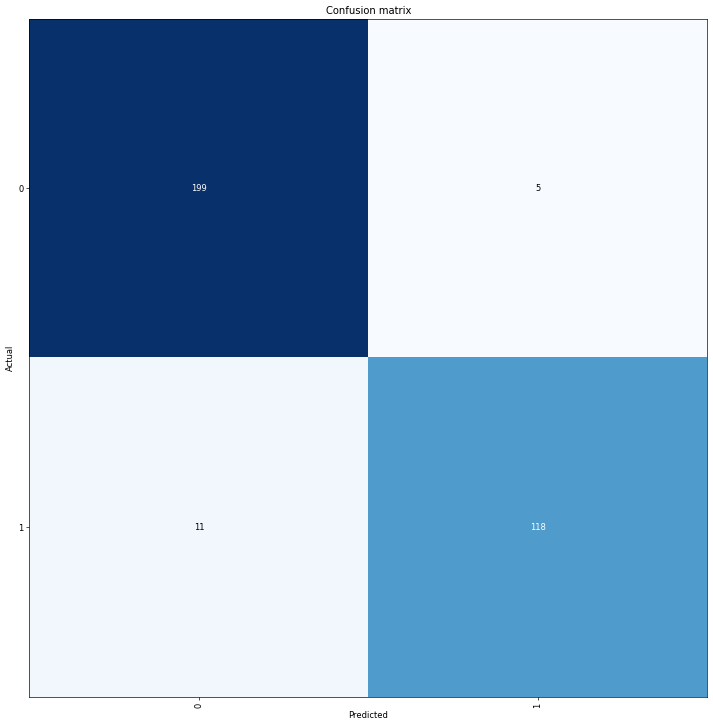

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [68]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [69]:
dest=Path(base_dir + "models/AV_emergency_vechiles/")
try:
  dest.mkdir(parents=True, exist_ok=False)
except FileExistsError:
  print ('File Already Exists')

File Already Exists


In [ ]:
learn.save(dest/'Resnet34-stage-2_bs16_train_97')

In [ ]:
test =(ImageList.from_df(df=df_test,path='./images')
      .split_none()
      .label_empty()
      .databunch(bs=32)).normalize(imagenet_stats)

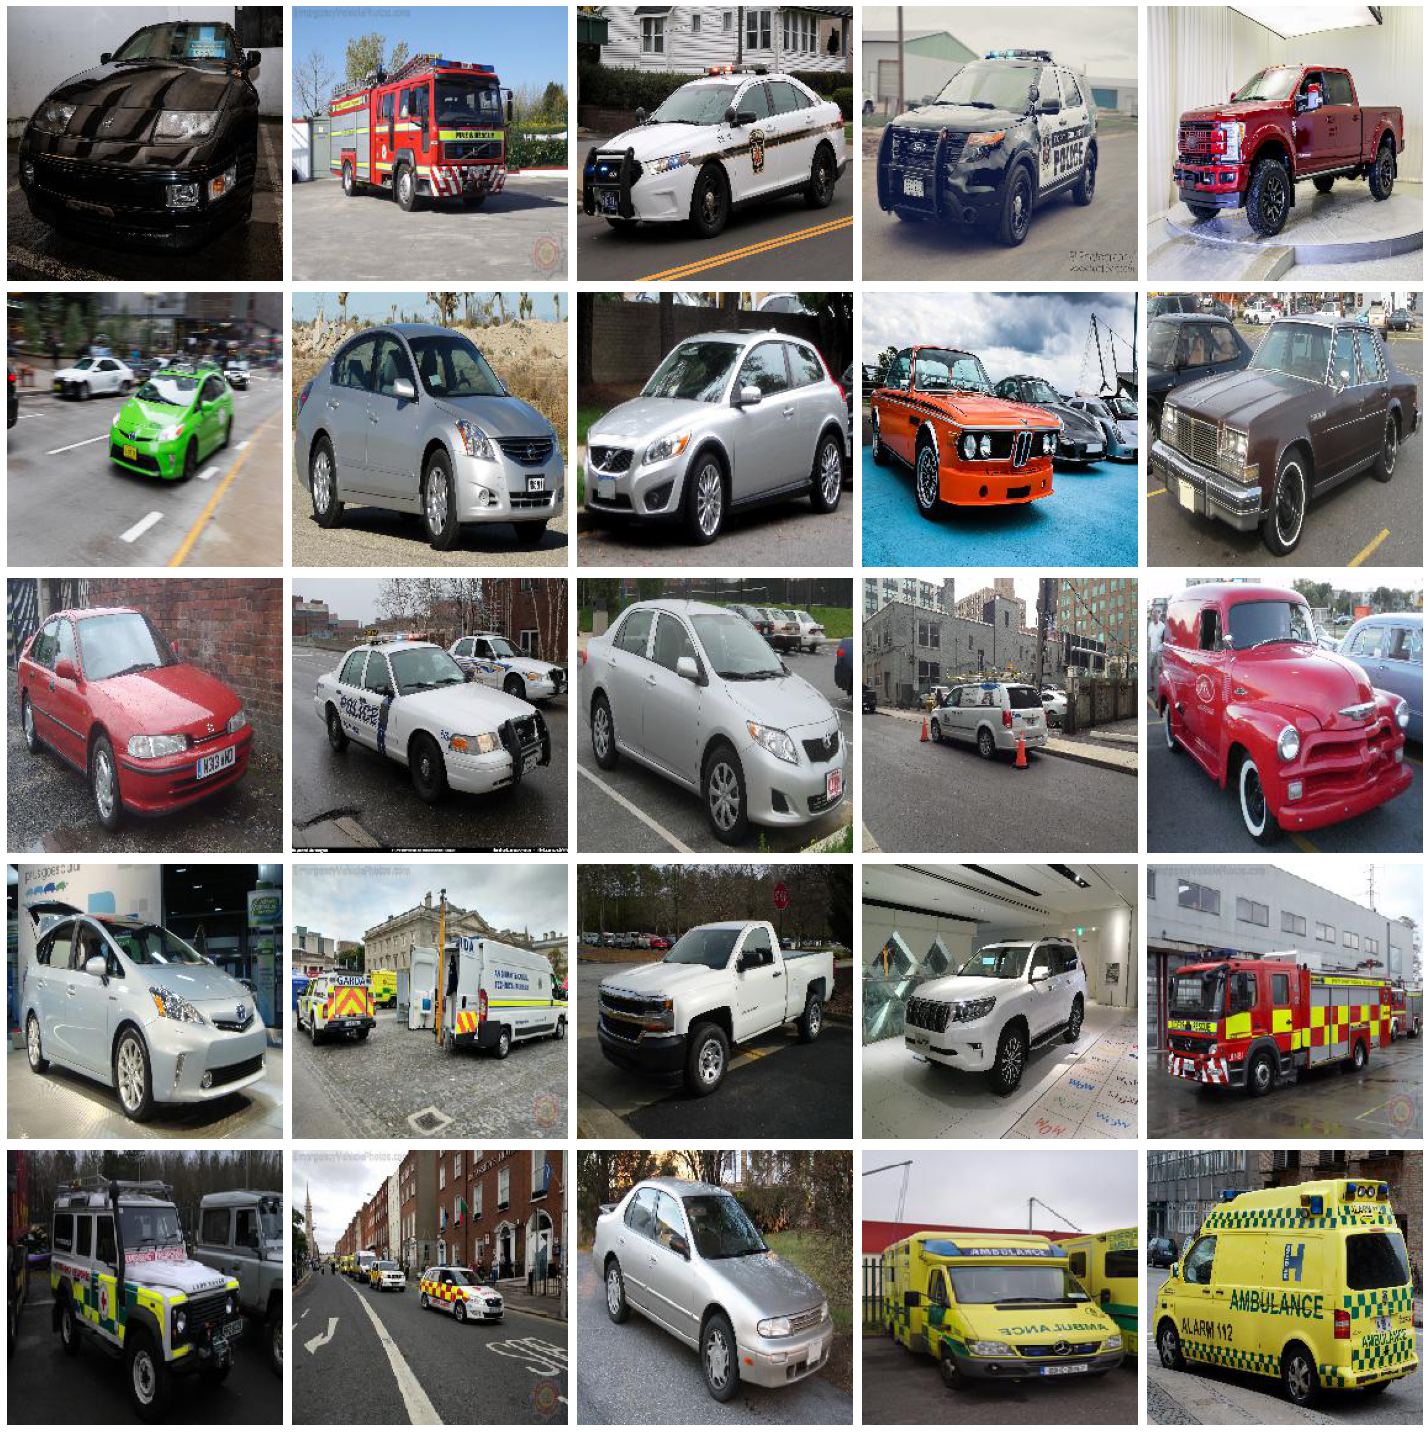

In [24]:
test.show_batch()

In [ ]:
submission_df=pd.DataFrame({'image_names': df_test['image_names'], 'emergency_or_not': 1})

In [ ]:
i=0
for images in submission_df.image_names:
  img=open_image('/content/Emergency/images/'+images)
  #print(img)
  pred_class,pred_idx,outputs = learn.predict(img)
  #print(pred_class)
  submission_df.iloc[i,1]=pred_class
  i=i+1


In [27]:
submission.head()

image_names emergency_or_not
0     1960.jpg                0
1      668.jpg                1
2     2082.jpg                0
3      808.jpg                1
4     1907.jpg                0
5      350.jpg                1
6     1557.jpg                0
7      111.jpg                1
8     1952.jpg                0
9     1466.jpg                0
10    2071.jpg                0
11    1891.jpg                0
12    1900.jpg                0
13    1927.jpg                0
14    1414.jpg                0

In [ ]:
submission_df.to_csv('submission_Resnet34_bs16_test1.csv', header=True, index=False)